# Agglomerative Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the data


In [2]:
df = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.drop('ID#',axis=1,inplace=True)

In [5]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


### Scaling the data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
data = scaler.fit_transform(df)

In [9]:
data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [10]:
df = pd.DataFrame(data=data, columns= df.columns)

In [11]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


### Feature Scaling

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=3)

In [14]:
pca

PCA(n_components=3)

In [15]:
pca_scaled = pca.fit_transform(df)

In [16]:
pca_scaled

array([[-1.46667427, -0.06718286, -0.80288006],
       [-1.4505642 , -0.06374317, -0.75202066],
       [-1.2100507 , -0.13355511, -0.76493683],
       ...,
       [ 0.17353576, -0.61180929,  0.40847963],
       [-1.69524058,  0.72653107,  0.43867994],
       [-2.10886559,  0.40309321,  0.50768892]])

In [17]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [18]:
df = pd.DataFrame(data=pca_scaled,columns= pca.get_feature_names_out())

In [19]:
df

,pca0,pca1,pca2
0,-1.466674,-0.067183,-0.802880
1,-1.450564,-0.063743,-0.752021
2,-1.210051,-0.133555,-0.764937
3,-1.507201,-0.061529,-0.754456
4,3.006984,-0.185534,-0.241241
...,...,...,...
3994,-0.955029,0.460020,0.385827
3995,-1.032571,0.301103,0.211921
3996,0.173536,-0.611809,0.408480
3997,-1.695241,0.726531,0.438680


### Hyperparameter Tuning

In [25]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from itertools import product
from sklearn.cluster import AgglomerativeClustering

In [26]:
def tune_agglomerative(data, cluster_range, metrics, linkages):
    best_score = -1
    best_params = {}
    param_grid = product(cluster_range, metrics, linkages)
    
    for n_clusters, metric, linkage in param_grid:
        if linkage == 'ward' and metric != 'euclidean':
            continue
        try:
            model = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage)
            labels = model.fit_predict(data)
            sil_score = silhouette_score(data, labels)
            
            if sil_score > best_score:
                best_score = sil_score
                best_params = {'n_clusters': n_clusters, 'metric': metric, 'linkage': linkage}
        except:
            continue

    return best_score, best_params

In [27]:
cluster_range = range(2, 10)
metrics = ['euclidean', 'manhattan']
linkages = ['ward', 'complete', 'average', 'single']

best_score, best_params = tune_agglomerative(df, cluster_range, metrics, linkages)

print(f"\nBest Silhouette Score: {best_score:.4f}")
print(f"Best Parameters: {best_params}")



Best Silhouette Score: 0.8918
Best Parameters: {'n_clusters': 2, 'metric': 'euclidean', 'linkage': 'single'}


- Best parameters are {'n_clusters': 2, 'metric': 'euclidean', 'linkage': 'single'}

### Model Training

In [28]:
model = AgglomerativeClustering(n_clusters= 2, metric='euclidean', linkage= 'single')

In [29]:
model

AgglomerativeClustering(linkage='single')

In [30]:
clusters = model.fit_predict(df)

In [31]:
df['Cluster'] = clusters

In [32]:
df.head()

,pca0,pca1,pca2,Cluster
0,-1.466674,-0.067183,-0.802880,0
1,-1.450564,-0.063743,-0.752021,0
2,-1.210051,-0.133555,-0.764937,0
3,-1.507201,-0.061529,-0.754456,0
4,3.006984,-0.185534,-0.241241,0


### Evaluation

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
silhouette_score(df,clusters)

np.float64(0.8919080732339606)

### Dendogram

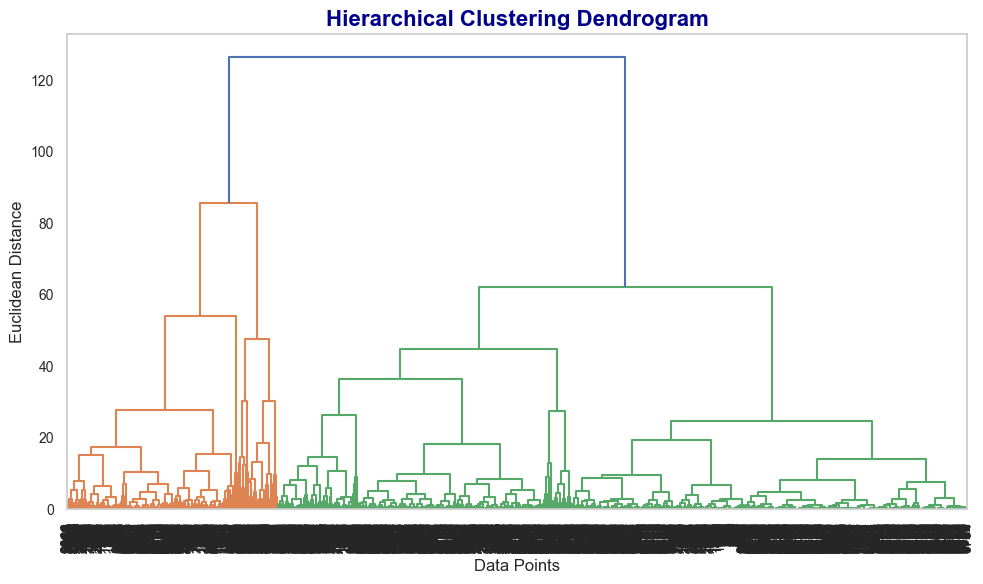

In [38]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(df, method='ward')

# Create the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    color_threshold=0.7 * max(linked[:, 2])  # Customize the threshold for color
)

plt.title("Hierarchical Clustering Dendrogram", fontsize=16, fontweight='bold', color="darkblue")
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("Euclidean Distance", fontsize=12)
plt.grid(False)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### Pairplot

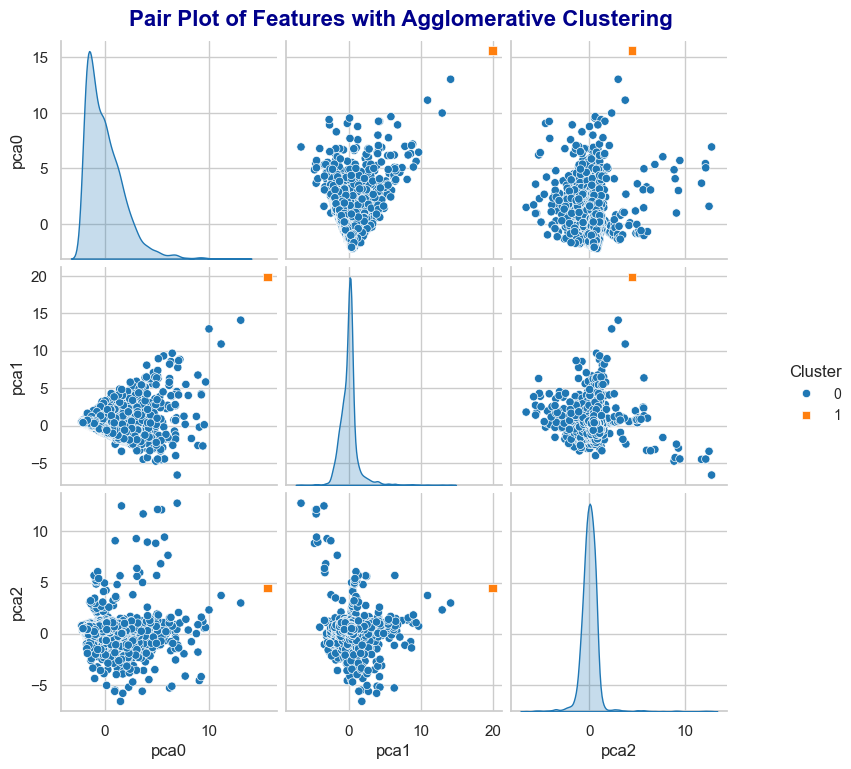

In [37]:
sns.set_theme(style="whitegrid")
palette = sns.color_palette("tab10", n_colors=df['Cluster'].nunique())

pair_plot = sns.pairplot(
    df, 
    hue="Cluster", 
    palette=palette, 
    diag_kind="kde", 
    markers=["o", "s", "D", "X", "P", "*"][:df['Cluster'].nunique()],
    height=2.5
)

pair_plot.fig.suptitle(
    "Pair Plot of Features with Agglomerative Clustering",
    fontsize=16, fontweight='bold', color="darkblue", y=1.02
)

pair_plot._legend.set_bbox_to_anchor((1.05, 0.5))
pair_plot._legend.set_title("Cluster")
for text in pair_plot._legend.texts:
    text.set_fontsize(10)

plt.show()

## 📊 **Analysis and Insights**

### 1. **Cluster Distribution**
- Two clusters are identified:  
   - **Cluster 0** (blue circles) – dense and dominant.  
   - **Cluster 1** (orange squares) – sparse and outliers.  

### 2. **Feature Relationships**
- **`pca0` vs `pca1`**: Cluster 0 forms a dense triangular shape, while Cluster 1 points are isolated outliers.  
- **`pca0` vs `pca2`**: Similar pattern with outliers far from the main group.  
- **`pca1` vs `pca2`**: Dense center for Cluster 0; Cluster 1 remains at extremes.  

### 3. **Diagonal KDE Plots**
- **`pca0`**: Right-skewed with some outliers at higher values.  
- **`pca1` & `pca2`**: Centered with sharp peaks, indicating lower variance.

### 4. **Key Observations**
- Cluster 1 represents **outliers**, distinctly separated from the dense Cluster 0.  
- `pca0` and `pca1` play a significant role in cluster separation, while `pca2` has less spread.

### 5. **Conclusion**
- Agglomerative Clustering effectively identifies the main dense cluster and separates the outliers.  
- Investigate Cluster 1 further for potential anomalies or data issues.  
